--- Step 1: Synthetic Data Generated ---
   Temperature  Vibration Failure_Type  Time_to_Failure
0    73.725103   0.495939   Electrical             2539
1   122.791967   0.550801   Electrical             1191
2    67.550280   0.949166   Mechanical              887
3    68.870092   1.043316   Mechanical              669
4    68.460958   0.440018   No_Failure             1000

Failure Type Distribution:
Failure_Type
Electrical    3000
Mechanical    3000
No_Failure    3000
Name: count, dtype: int64


--- PART 1: CLASSIFICATION ---
Classification Report:
              precision    recall  f1-score   support

  Electrical       0.87      0.81      0.84       744
  Mechanical       0.76      0.71      0.73       750
  No_Failure       0.65      0.74      0.69       756

    accuracy                           0.75      2250
   macro avg       0.76      0.75      0.75      2250
weighted avg       0.76      0.75      0.75      2250

An error occurred: bad allocation
Error in callback <function 

MemoryError: bad allocation

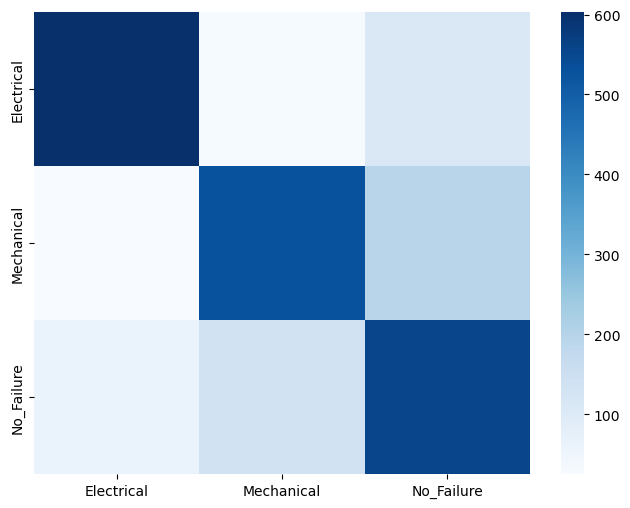

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # --- Step 1: Generate a Realistic Predictive Maintenance Dataset ---
    np.random.seed(42)
    n_samples = 3000
    
    # Generate normal operating data
    temp_norm = np.random.normal(70, 5, n_samples)
    vib_norm = np.random.normal(0.5, 0.1, n_samples)
    df_norm = pd.DataFrame({
        'Temperature': temp_norm, 'Vibration': vib_norm,
        'Failure_Type': 'No_Failure', 'Time_to_Failure': 1000
    })

    # Generate data for an impending electrical failure (rising temperature)
    temp_elec = 70 + np.linspace(0, 25, n_samples)**1.5 + np.random.normal(0, 3, n_samples)
    vib_elec = np.random.normal(0.5, 0.1, n_samples)
    df_elec = pd.DataFrame({
        'Temperature': temp_elec, 'Vibration': vib_elec,
        'Failure_Type': 'Electrical', 'Time_to_Failure': np.arange(n_samples, 0, -1)
    })

    # Generate data for an impending mechanical failure (rising vibration)
    temp_mech = np.random.normal(70, 5, n_samples)
    vib_mech = 0.5 + np.linspace(0, 1, n_samples)**2 + np.random.normal(0, 0.1, n_samples)
    df_mech = pd.DataFrame({
        'Temperature': temp_mech, 'Vibration': vib_mech,
        'Failure_Type': 'Mechanical', 'Time_to_Failure': np.arange(n_samples, 0, -1)
    })
    
    df = pd.concat([df_norm, df_elec, df_mech], ignore_index=True).sample(frac=1).reset_index(drop=True)
    
    print("--- Step 1: Synthetic Data Generated ---")
    print(df.head())
    print("\nFailure Type Distribution:")
    print(df['Failure_Type'].value_counts())
    print("\n")

    # --- Part 1: Classification (Predict Failure Type) ---
    print("--- PART 1: CLASSIFICATION ---")
    X = df[['Temperature', 'Vibration']]
    y_class = df['Failure_Type']
    X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.25, random_state=42)

    # Train a RandomForestClassifier
    class_model = RandomForestClassifier(n_estimators=100, random_state=42)
    class_model.fit(X_train_c, y_train_c)
    
    # Evaluate the classifier
    y_pred_c = class_model.predict(X_test_c)
    print("Classification Report:")
    print(classification_report(y_test_c, y_pred_c))
    
    cm = confusion_matrix(y_test_c, y_pred_c)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_model.classes_, yticklabels=class_model.classes_)
    plt.title('Classification Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.savefig('classification_confusion_matrix.png')
    print("Classification confusion matrix saved as 'classification_confusion_matrix.png'\n")

    # --- Part 2: Regression (Predict Time-to-Failure) ---
    print("--- PART 2: REGRESSION ---")
    # For regression, we only care about data where a failure is happening.
    df_failures_only = df[df['Failure_Type'] != 'No_Failure'].copy()
    
    X_reg = df_failures_only[['Temperature', 'Vibration']]
    y_reg = df_failures_only['Time_to_Failure']
    X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)

    # Train a RandomForestRegressor
    reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
    reg_model.fit(X_train_r, y_train_r)
    
    # Evaluate the regressor
    y_pred_r = reg_model.predict(X_test_r)
    rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))
    r2 = r2_score(y_test_r, y_pred_r)
    
    print(f"Regression Root Mean Squared Error (RMSE): {rmse:.2f} time units")
    print(f"Regression R-squared (R2) Value: {r2:.4f}")
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_test_r, y=y_pred_r, alpha=0.6)
    plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--', lw=2)
    plt.title('Regression: Actual vs. Predicted Time-to-Failure')
    plt.xlabel('Actual Time-to-Failure')
    plt.ylabel('Predicted Time-to-Failure')
    plt.savefig('regression_time_to_failure.png')
    print("Regression scatter plot saved as 'regression_time_to_failure.png'\n")

    print("--- Analysis Complete ---")

except Exception as e:
    print(f"An error occurred: {e}")